#Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
# categorical variable train dataframe

file_path_trainC = "/content/TRAIN_CATEGORICAL.csv"
train_cat = pd.read_csv(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [ ]:
# Functional Connectome Matrices

file_path_trainFCM = "/content/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
# Quantitative varaible train dataframe

file_path_trainQ = "/content/TRAIN_QUANTITATIVE.csv"
train_Quant = pd.read_csv(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [ ]:
# ADHD and Sex solutions dataframe for model training

file_path_trainS = "/content/TRAINING_SOLUTIONS.csv"
train_Solutions = pd.read_csv(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [ ]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

#Look back at the dictionary on Kaggle!
# to see what category these integers [0, 45, 35...] represent.

,count
Barratt_Barratt_P2_Occ,
0,287
45,239
35,195
30,149
40,116
15,86
20,41
5,38
10,37


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

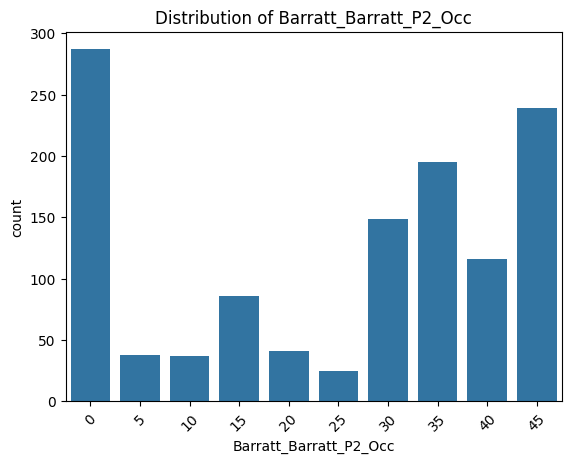

In [ ]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

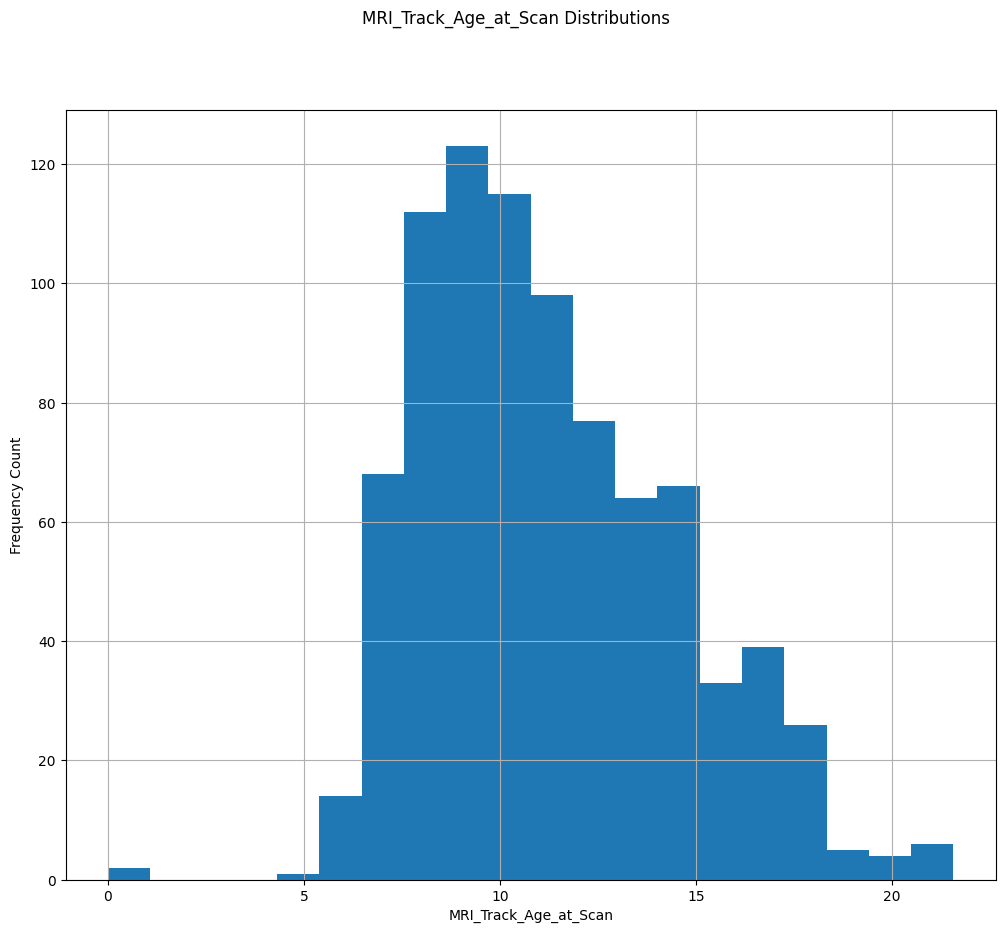

In [ ]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()


In [ ]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

,count
ADHD_Outcome,
1,831
0,382


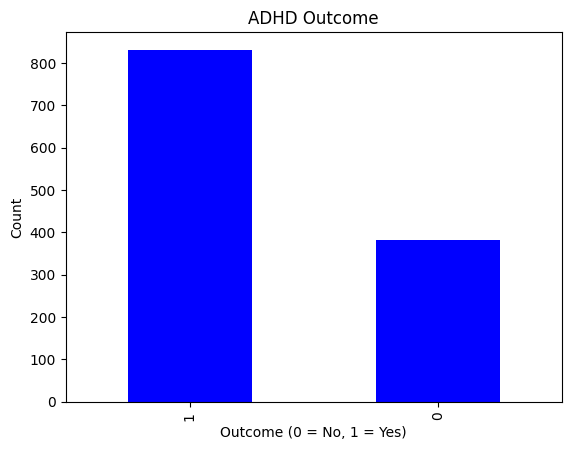

In [ ]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Gender distribution
train_Solutions['Sex_F'].value_counts()

,count
Sex_F,
0,797
1,416


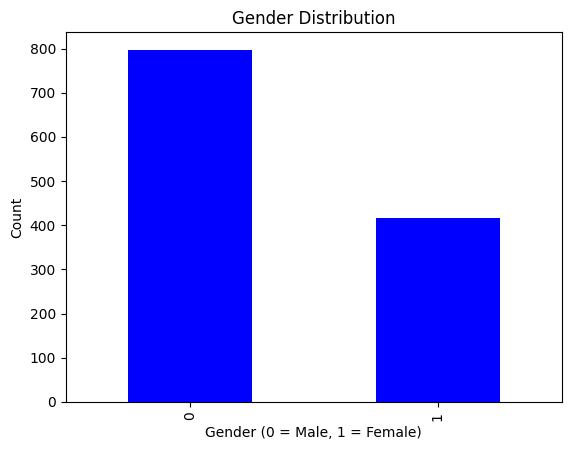

In [ ]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

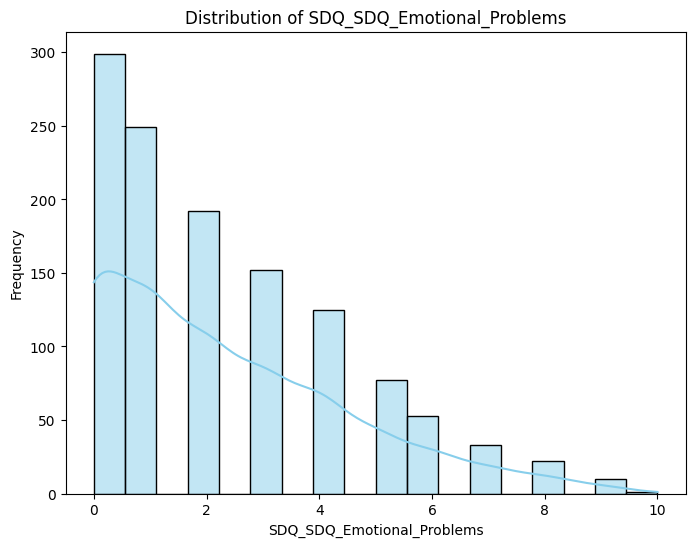

In [ ]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

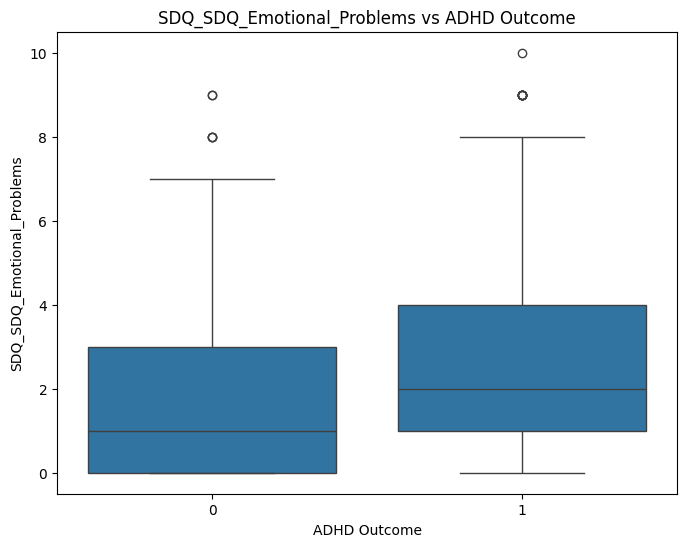

In [ ]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()


In [ ]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
0     0.600000
3     0.800000
6     0.600000
9     0.678571
12    0.721649
15    0.672840
18    0.700713
21    0.672340
Name: ADHD_Outcome, dtype: float64


##One Hot Encoding

In [ ]:
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [ ]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [ ]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-19-1d15a0192691>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# load in test categorical dataframe

file_path_testC = "/content/TEST_CATEGORICAL.csv"
test_cat = pd.read_csv(file_path_testC)
#(test_cat.head()

In [ ]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

<ipython-input-22-bd9c2ff2a55a>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,Barratt_Barratt_P2_Edu_21,Barratt_Barratt_P2_Occ_5,Barratt_Barratt_P2_Occ_10,Barratt_Barratt_P2_Occ_15,Barratt_Barratt_P2_Occ_20,Barratt_Barratt_P2_Occ_25,Barratt_Barratt_P2_Occ_30,Barratt_Barratt_P2_Occ_35,Barratt_Barratt_P2_Occ_40,Barratt_Barratt_P2_Occ_45
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

# ensure it looks accurate
train_df.head()


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,0.0,1,0,0,0,0,0,0,0,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,1.0,0,0,0,1,0,0,1,0,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,1.0,1,0,0,0,0,0,0,0,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,0.0,0,0,1,0,0,0,1,0,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.0,0,0,0,1,0,0,1,0,...,1,18,4,11,4,10,7,3,9,8.940679


In [ ]:
file_path_testFCM = "/content/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)
#print(train_FCM.head())

file_path_testQ = "/content/TEST_QUANTITATIVE.csv"
test_Quant = pd.read_csv(file_path_testQ)
#print(train_Quant.head())

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0,0,0,0,0,0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0,0,0,0,0,0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0,0,0,0,0,0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0,0,0,0,0,0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0,0,0,0,0,0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [ ]:
pd.set_option('max_columns', None)
df = pd.read_csv("../input/recipeData.csv", encoding='latin-1').set_index("BeerID")

## NA values

In [ ]:
# check how many NA values we have
print(train_df.isna().sum())

# 371 NANs values
# 360 in MRI_Track_age_at_Scan
# 11 in PreInt_Demos_Fam_Child_Ethnicity

participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity     11
Basic_Demos_Enroll_Year_2016          0
Basic_Demos_Enroll_Year_2017          0
Basic_Demos_Enroll_Year_2018          0
                                   ... 
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan               360
Length: 19973, dtype: int64


In [ ]:
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum()) # should now be zero

0


In [ ]:
train_df.ffill(inplace=True)
print(train_df.isna().sum().sum())

0


In [ ]:
# Fill NAs of test data

for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [ ]:
file_path_trainS = "/content/TRAINING_SOLUTIONS.csv"
train_Solutions = pd.read_csv(file_path_trainS)

In [ ]:
X_train = train_df.drop(columns = ['participant_id'])
Y_train = train_Solutions.drop(columns = ['participant_id'])

#GNN

## Training

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00


In [25]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
features_df = pd.read_csv("/content/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
labels_df = pd.read_csv("/content/TRAINING_SOLUTIONS.csv")

# Merge datasets on participant_id
merged_df = features_df.merge(labels_df, on='participant_id')

# Extract all numerical node features (excluding participant_id)
node_features = merged_df.iloc[:, 1:-2].values  # Exclude ID and labels columns

# Extract labels
labels = merged_df[['ADHD_Outcome', 'Sex_F']].values

# Compute similarity matrix
similarity_matrix = cosine_similarity(node_features)

# Define threshold to create edges
threshold = 0.225  # Adjust based on data distribution, lower if graph is too sparse, higher if too dense
edge_index = []
edge_attr = []

num_nodes = len(merged_df)
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if similarity_matrix[i, j] > threshold:
            edge_index.append([i, j])
            edge_index.append([j, i])  # Undirected graph
            edge_attr.append(similarity_matrix[i, j])
            edge_attr.append(similarity_matrix[i, j])

# Convert to tensors
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float32)
x = torch.tensor(node_features, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

# Save processed data
torch.save(data, "processed_graph_data.pt")

print("Graph data saved with", data.num_nodes, "nodes and", data.num_edges, "edges.")

Graph data saved with 1213 nodes and 1718 edges.


In [34]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader

# Define GNN Model
class GNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim_adhd, output_dim_gender):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim)
        self.fc_adhd = torch.nn.Linear(hidden_dim, output_dim_adhd)
        self.fc_gender = torch.nn.Linear(hidden_dim, output_dim_gender)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.fc(x)

        # Separate outputs for ADHD and Gender
        adhd_out = self.fc_adhd(x)
        gender_out = self.fc_gender(x)
        return adhd_out, gender_out

# Load processed graph data with weights_only=True to avoid warnings
data = torch.load("processed_graph_data.pt", weights_only=False)

# Model parameters
input_dim = data.x.shape[1]  # Number of node features
hidden_dim = 64  # Hidden layer size
output_dim_adhd = 2  # Output for ADHD (binary classification)
output_dim_gender = 2  # Output for Gender (binary classification)

# Initialize model
model = GNN(input_dim, hidden_dim, output_dim_adhd, output_dim_gender)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Loss function: we use CrossEntropyLoss separately for ADHD and Gender
criterion_adhd = torch.nn.CrossEntropyLoss()
criterion_gender = torch.nn.CrossEntropyLoss()

# Training loop
def train(model, data, epochs=100):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        adhd_out, gender_out = model(data)

        # Separate loss for ADHD and Gender
        loss_adhd = criterion_adhd(adhd_out, data.y[:, 0])  # Assuming data.y[:, 0] is ADHD target
        loss_gender = criterion_gender(gender_out, data.y[:, 1])  # Assuming data.y[:, 1] is Gender target
        loss = loss_adhd + loss_gender

        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation function
def test(model, data):
    model.eval()
    with torch.no_grad():
        adhd_out, gender_out = model(data)
        adhd_predictions = adhd_out.argmax(dim=1)
        gender_predictions = gender_out.argmax(dim=1)
        true_labels = data.y

        # ADHD accuracy
        adhd_correct = (adhd_predictions == true_labels[:, 0]).sum().item()
        adhd_accuracy = adhd_correct / data.num_nodes

        # Gender accuracy
        gender_correct = (gender_predictions == true_labels[:, 1]).sum().item()
        gender_accuracy = gender_correct / data.num_nodes

        print(f"Test Accuracy - ADHD: {adhd_accuracy:.4f}, Gender: {gender_accuracy:.4f}")

# Train the model
train(model, data, epochs=100)

# Test the model on training data
test(model, data)

# Save trained model
torch.save(model.state_dict(), "gnn_model.pth")
print("Model trained and saved.")

Epoch 0, Loss: 1.4532
Epoch 10, Loss: 0.4606
Epoch 20, Loss: 0.2851
Epoch 30, Loss: 0.1430
Epoch 40, Loss: 0.1142
Epoch 50, Loss: 0.0861
Epoch 60, Loss: 0.1364
Epoch 70, Loss: 0.7911
Epoch 80, Loss: 0.2034
Epoch 90, Loss: 0.1574
Test Accuracy - ADHD: 0.9852, Gender: 0.9736
Model trained and saved.


## Testing

In [35]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.metrics.pairwise import cosine_similarity

# Load test dataset (replace with the actual file path)
test_features_df = pd.read_csv("/content/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")  # Replace with actual test dataset file path

# Compute the similarity matrix based on the test node features
node_features = test_features_df.iloc[:, 1:].values  # Exclude participant_id column

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(node_features)

# Define a threshold for edge creation (adjust if needed)
threshold = 0.585  # Adjust based on desired graph sparsity/density
edge_index = []
edge_attr = []

num_nodes = len(test_features_df)
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if similarity_matrix[i, j] > threshold:
            edge_index.append([i, j])
            edge_index.append([j, i])  # For undirected graph
            edge_attr.append(similarity_matrix[i, j])
            edge_attr.append(similarity_matrix[i, j])

# Convert to tensors
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(edge_attr, dtype=torch.float32)
x = torch.tensor(node_features, dtype=torch.float32)

# Create PyTorch Geometric Data object (no labels for test data)
test_data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

# Save processed test graph data
torch.save(test_data, "processed_test_graph_data.pt")

# Optionally, create a DataFrame for participant_ids (for reference in submission)
test_submission_df = pd.DataFrame({
    'participant_id': test_features_df['participant_id']
})

test_submission_df.to_csv('processed_test_graph_data.csv', index=False)

print("Test graph data saved with", test_data.num_nodes, "nodes and", test_data.num_edges, "edges.")

Test graph data saved with 304 nodes and 1186 edges.


In [36]:
# Load the saved model
model = GNN(input_dim=x.shape[1], hidden_dim=64, output_dim_adhd=2, output_dim_gender=2)
model.load_state_dict(torch.load('gnn_model.pth'))  # Load trained model weights
model.eval()  # Set the model to evaluation mode

# Make predictions
with torch.no_grad():  # Disable gradient computation for inference
    adhd_out, gender_out = model(test_data)  # Get model outputs for the new data

    # Get the predicted classes (ADHD and Gender/Sex)
    adhd_preds = adhd_out.argmax(dim=1).numpy()  # ADHD predictions (0 or 1)
    gender_preds = gender_out.argmax(dim=1).numpy()  # Gender predictions (0 or 1)

In [37]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'participant_id': test_features_df['participant_id'],  # Ensure participant_ids are correct
    'ADHD_Outcome': adhd_preds,  # ADHD predictions
    'Sex_F': gender_preds  # Gender predictions (0 = male, 1 = female)
})

# Save the results to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Optionally, print the DataFrame to check the content
print(submission_df.head)  # Print the first few rows to verify

<bound method NDFrame.head of     participant_id  ADHD_Outcome  Sex_F
0     Cfwaf5FX7jWK             1      0
1     vhGrzmvA3Hjq             1      0
2     ULliyEXjy4OV             1      0
3     LZfeAb1xMtql             1      1
4     EnFOUv0YK1RG             1      0
..             ...           ...    ...
299   UadZfjdEg7eG             1      0
300   IUEHiLmQAqCi             1      0
301   cRySmCadYFRO             1      1
302   E3MvDUtJadc5             1      0
303   dQJXfyRazknD             1      0

[304 rows x 3 columns]>
